# Hands-On Machine Learning with Python
# Chapter 1 - The Machine Learning Landscape
# Example 1-1: Life Satisfaction

In [2]:
# Provides access to objects maintained by the Python interpreter e.g. command line arg lists
import sys
assert sys.version_info >= (3, 5)

In [3]:
# Sklearn >= 0.20 is required 
import sklearn 
assert sklearn.__version__ >= "0.20"

Function that merges the OECD dataset's life satisfaction data with the IMF's GDP per capita data using (I think) a Python-based version of an inner join. 

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    # Find all the measures in the OECD dataset where the relationship b/w qty and value is TOTAL
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    
    # Make a pivot table where all TOTAL qtys are grouped according to country
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    
    # In the GDP per capita column, rename the "2015" column to "GDP per capita" w/o returning a new df
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    
    # The Country column is the index for this new dataframe
    gdp_per_capita.set_index("Country", inplace=True)
    
    # Merge or Join based on Country name
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, 
                                 left_index=True, right_index=True)
    
    # Sort the values according to the GDP per capita (highest to lowest default?)
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    
    # The countries we are not interested in plotting at the moment
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    
    # All the other countries
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    # Return the GDP per Capita and Life Satisfaction columns along with the Country names
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [5]:
# Store the filepath for the OECD and GDP CSV files
import os 
working_directory = os.getcwd()
datapath = os.path.join(working_directory, "lifesat", "")

In [6]:
# Configuring Jupyter to plot figures with matplotlib
import matplotlib as mpl 
%matplotlib inline 

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

## Code Example: Loading and Plotting Data

In [7]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import sklearn.linear_model

In [8]:
# Load the data - kwargs for specifying delimiters, thousands separators, and missing values
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',') 
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t', 
                            encoding='latin1', na_values='n/a')

In [9]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [10]:
# Extracting features and targets as numpy column stacks
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

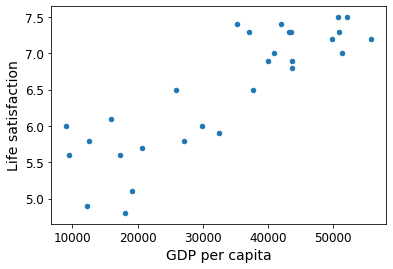

In [11]:
# Visualize the data using `pandas` built-in plotting functions
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')

In [12]:
# A function to save figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [13]:
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure: ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [14]:
# Make this notebook's output stable across runs by seeding the random number generator
np.random.seed(42)

## Load and Prepare Life Satisfaction Data

In [15]:
# Somewhat similar to the previous preprocessing operation, but this one confirms my earlier 
# assumption that the pivot table finds the total value for an indicator and groups them by country
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [16]:
# We're only concerned with the life satisfaction indicator
oecd_bli['Life satisfaction'].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

## Load and Prepare GDP per Capita data

In [17]:
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', delimiter='\t', 
                            encoding='latin1', na_values='n/a')
gdp_per_capita.rename(columns={'2015':'GDP per capita'}, inplace=True)
gdp_per_capita.set_index('Country', inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


## Merging Datasets
- Actually sorts the data in ascending order by GDP, and not descending.
- Also, the `left_index=True` and `right_index=True` probably means the index is being used to match? 

In [18]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by='GDP per capita', inplace=True)
full_country_stats.head(3)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0


In [19]:
# Examining the GDP per capita and life satisfaction for US - loc means indexing based on index value, not number
full_country_stats[['GDP per capita', 'Life satisfaction']].loc['United States']

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [20]:
# Remove indices: which countries are we initially removing from the scatter plot
remove_indices = [0, 1, 6, 8, 33, 34, 35]

# Create a list of 36 countries, and drop all countries in the remove_indices
keep_indices = list(set(range(36)) - set(remove_indices))

In [21]:
# Data for the initial set of countries
sample_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

# Data for the excluded countries
missing_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[remove_indices]

## Scatterplot to show linear trend

Saving figure:  money_happy_scatterplot


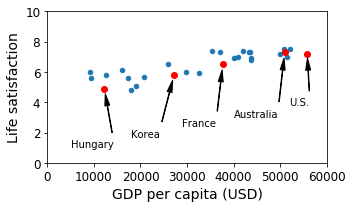

In [22]:
# Original scatterplot
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))

# Defining x and y axes limits for the scatterplot
plt.axis([0, 60000, 0, 10])

# Dictionary of country names and their coordinates in the scatterplot 
position_text = {
    'Hungary': (5000, 1),
    'Korea': (18000, 1.7), 
    'France': (29000, 2.4),
    'Australia': (40000, 3.0),
    'United States': (52000, 3.8)
}

# Custom markers for the new countries
for country, pos_text in position_text.items():
    # Tuple unpacking to get the coordinates for each country 
    pos_data_x, pos_data_y = sample_data.loc[country]
    
    # Smaller, custom annotation for the US
    country = 'U.S.' if country == 'United States' else country
    
    # Create arrows to the markers and add country names at the end
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, 
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    
    # Annotated countries are red dots
    plt.plot(pos_data_x, pos_data_y, 'ro')
    
plt.xlabel('GDP per capita (USD)')
save_fig('money_happy_scatterplot')
plt.show()

In [23]:
# Saving the joined dataset to a new CSV
sample_data.to_csv('lifesat.csv')

In [24]:
# Using the country names for red labels to get their GDPs and life satisfactions
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


## Manually Plotting Regression Models

Saving figure:  tweaking_model_params_plot


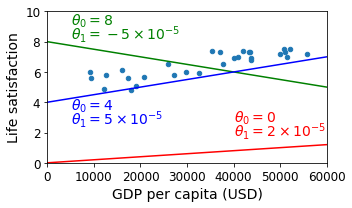

In [25]:
import numpy as np

sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))
plt.xlabel('GDP per capita (USD)')
plt.axis([0, 60000, 0, 10])

# Values of X for plotting straight lines - every 1k between 0 and 60k
X = np.linspace(0, 60000, 1000)

# Model 1: theta_0 = 0, theta_1 = 2 * 10-5
plt.plot(X, 2 * X / 100000, 'r')
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

# Model 2: theta_0 = 4, theta_1 = 5 * 10-5
plt.plot(X, 8 - 5 * X / 100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g" )
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

# Model 3: theta_0 = 8, theta_1 = -5 *10-5
plt.plot(X, 4 + 5 * X / 100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b" )
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

save_fig("tweaking_model_params_plot")

## `sklearn` Regression Model

In [26]:
from sklearn import linear_model

# Instantiate a linear regression model
lin_1 = linear_model.LinearRegression()

# Features: the GDP per capita
X_sample = np.c_[sample_data['GDP per capita']]

# Target: the Life Satisfaction
y_sample = np.c_[sample_data['Life satisfaction']]

# Optimise values of theta_0 and theta_1 to fit the training data
lin_1.fit(X_sample, y_sample)

# What are the values of the parameters?
# intercept = theta_0, coef[0][0] is theta_1
t_0, t_1 = lin_1.intercept_[0], lin_1.coef_[0][0]
t_0, t_1

(4.853052800266436, 4.911544589158484e-05)

## Scatterplot with LinReg Model

Saving figure:  best_fit_model_plot


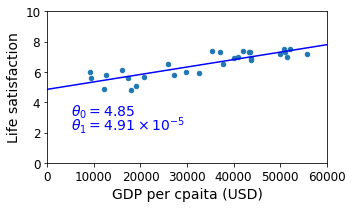

In [28]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))
plt.xlabel('GDP per cpaita (USD)')
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)
plt.plot(X, t_0 + t_1 * X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()

## Predicting Cyprus' Life Satisfaction

In [30]:
cyprus_gdp_per_capita = gdp_per_capita.loc['Cyprus']['GDP per capita']
print("Cyprus GDP per capita: ", cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin_1.predict([[cyprus_gdp_per_capita]])[0][0]
print("Cyprus predicted life satisfaction: ", cyprus_predicted_life_satisfaction)

Cyprus GDP per capita:  22587.49
Cyprus predicted life satisfaction:  5.96244744318815


Saving figure:  cyprus_prediction_plot


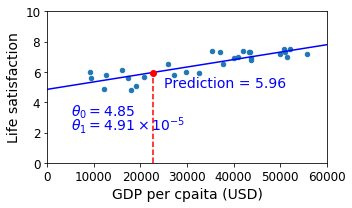

In [31]:
# Plotting this predicted life satisfaction on the scatterplot with linreg model
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))
plt.xlabel('GDP per cpaita (USD)')
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)
plt.plot(X, t_0 + t_1 * X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

# Plot a vertical, straight red dotted line between x1, y1 and x2, y2. First set is (x1, x2) and second is (y1, y2)
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], 'r--')
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('cyprus_prediction_plot')
plt.show()

## Instance-based Approach 
If we were to use an instance-based approach for this problem, we would simply find the three, four, five, or `k` countries with life GDP per capitas closest to that of Cyprus. The predicted life satisfaction for Cyprus would then be the average of the life satisfactions for these `k` nearest countries based on the similarity in their GDP per capita. 

In [32]:
# Because data is already sorted according to GDP, similar GDPs are grouped together
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [42]:
# Finding the average life satisfaction for these three countries
instance_based_life_satisfaction = sample_data.loc[['Portugal', 'Slovenia', 'Spain']]['Life satisfaction'].mean()
print("Predicted instance-based life satisfactin for Cyprus: ", instance_based_life_satisfaction)

Predicted instance-based life satisfactin for Cyprus:  5.766666666666667


## Recap: Load, Preprocess, Plot, Train

In [45]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
    gdp_per_capita.set_index('Country', inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, 
                                 left_index=True, right_index=True)
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

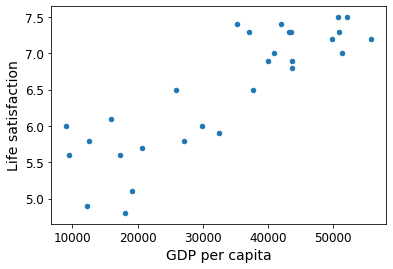

[[5.96242338]]


In [48]:
# Import required libraries
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', delimiter='\t',
                            encoding='latin1', na_values='n/a')

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Visualize
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus GDP per capita
print(model.predict(X_new)) 

## How does missing data affect the linear model?

In [51]:
oecd_bli, gdp_per_capita = backup
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [52]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

Saving figure:  representative_training_data_scatterplot


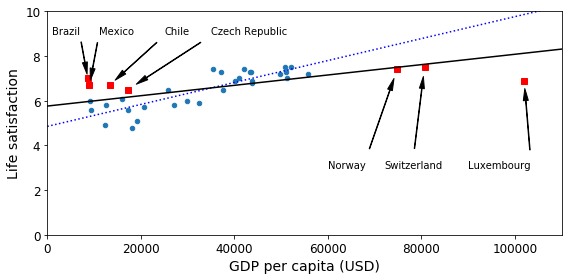

In [65]:
# Add missing countries to plot and visualize the change in the linear regression model
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(8, 4))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    # x, y coordinates of arrow annotations for the missing country data points
    pos_data_x, pos_data_y = missing_data.loc[country]
    
    # Add arrows
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, 'rs')

# Plot the old linear regression model (trained without missing countries) as dotted blue line
X = np.linspace(0, 110000, 1000)
plt.plot(X, t_0 + t_1 * X, "b:")

# Train the new linear regression model with all countries, including missing ones
lin_reg_full = linear_model.LinearRegression()
X_full = np.c_[full_country_stats['GDP per capita']]
y_full = np.c_[full_country_stats['Life satisfaction']]
lin_reg_full.fit(X_full, y_full)

# Extract the parameters from the newly trained model
t_0_full, t_1_full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

# Plot the new model as a solid black line
X = np.linspace(0, 110000, 1000)
plt.plot(X, t_0_full + t_1_full * X, 'k')
plt.xlabel('GDP per capita (USD)')

# Save the plot
save_fig('representative_training_data_scatterplot')
plt.show()

## Demonstating Ovefitting
Using a very high order polynomial to fit the training data. The resulting curve shows clear signs of overfitting. It will not generalize well to new data.

/Users/saadmashkoor/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/saadmashkoor/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Saving figure:  overfitting_model_plot


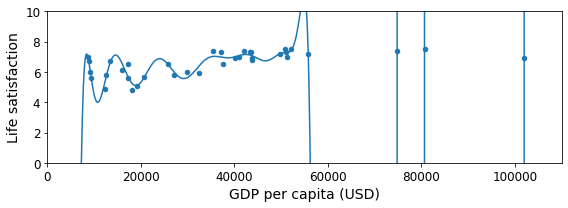

In [66]:
full_country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(8, 3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

# 60th order polynomial: generating x, x^2, x^3, x^4,...,x^60 with the same feature 
poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)

# Standardising the features so that they occupy roughly the same range
scaler = preprocessing.StandardScaler()

# Instantiating a new linear regression model
lin_reg_2 = linear_model.LinearRegression()

# Pipeline object will create polynomial features, scale them, and then feed them to a lin reg model
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg_2)])

# Fit the model returned by the pipeline on the training data
pipeline_reg.fit(X_full, y_full)

# Plot the curve
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel('GDP per capita (USD)')
save_fig('overfitting_model_plot')

## Irrelevant Features
Coincidentally, all countries that have the letter `w` in their names have life satisfaction indices > 7. If we were to feed the name of the country as a feature into a model, it may introduce sampling noise by causing the model to assume that the frequency of the letter `w` in a country's name has an effect on its life satisfaction.

In [67]:
# Code that finds all countries with `w` in their names to show life sastifaction rule does not apply
gdp_per_capita.loc[[c for c in gdp_per_capita.index if 'W' in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


## Comparing Models 
In this plot, we visualize three models
- the original model training on partial data i.e. not trained on the missing countries.
- a model trained on all available training data i.e. including the missing countries
- a new model trained on partial data but with regularization

The point of this graph is to show that regularization can help mitigate the effect of overfitting, and by constraining the parameters of the model, we are able to achieve a line that is closer to that created by training the model on the entire data (which, in this case, is our yardstick for a 'good' model). As such, regularization can help improve model performance even when we don't have a lot of training data available.

Saving figure:  ridge_model_plot


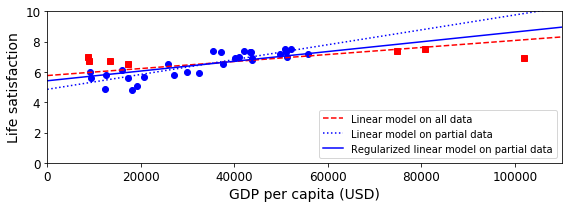

In [70]:
plt.figure(figsize=(8, 3))
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data['GDP per capita']), list(sample_data['Life satisfaction']), 'bo')
plt.plot(list(missing_data['GDP per capita']), list(missing_data['Life satisfaction']), 'rs')

X = np.linspace(0, 110000, 1000)
plt.plot(X, t_0_full + t_1_full * X, 'r--', label='Linear model on all data')
plt.plot(X, t_0 + t_1 * X, 'b:', label='Linear model on partial data')

# Regularized model: instantiation, training, parameter extracting, and plotting
ridge = linear_model.Ridge(alpha=10 ** 9.5)
X_sample = np.c_[sample_data['GDP per capita']]
y_sample = np.c_[sample_data['Life satisfaction']]
ridge.fit(X_sample, y_sample)
t_0_ridge, t_1_ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t_0_ridge + t_1_ridge * X, 'b', label='Regularized linear model on partial data')

# Annotating the plot
plt.legend(loc='lower right')
plt.axis([0, 110000, 0, 10])
plt.xlabel('GDP per capita (USD)')
save_fig('ridge_model_plot')
plt.show()

## `KNN` Demonstration
This model shows that the instance-based algorithm we implemented earlier was indeed a `k`-nearest neigbours regressor with `k` = 3. The predicted Cyuprus life satisfaction as an average of those of the three countries with the most similar (nearest) GDP per capita was 5.76. This will be the same as the life satisfaction predicted by KNN regressor with 3 neighbors.

In [71]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [72]:
# Extract features and targets
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = np.array([[22587.0]])
print(model.predict(X_new))

[[5.76666667]]
